<a href="https://colab.research.google.com/github/Jung0Jin/Pytorch_study/blob/master/2.%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

출처 : https://github.com/Namsik-Yoon/pytorch_basic/blob/master/2.%20%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80(Linear_Regression).ipynb 

이번에도 몰래 가져왔다. 이번에도 필사를 필사적으로 해보자.

#2. 선형회귀(Linear Regression)

## 2.1 선형회귀(Linear Regression)

학습목표 : 아래 개념들을 잘 이해하자

데이터에 대한 이해(Data Definition)

가설(Hypothesis) 수립

손실 계산하기(Compute loss)

경사 하강법(Gradient Descent)

이번 장에 아주 좋은 말이 많은데, 나는 이미 이해해서 또 쓰기 귀찮다.

https://wikidocs.net/53560

링크를 참고하면 정말 좋은 이야기가 많다.

2.1.1 데이터에 대한 이해(Data Definition)

2.1.2 가설(Hypothesis) 수립

2.1.3 비용 함수(Cost function)에 대한 이해

2.1.4 옵티마이저 - 경사 하강법(Gradient Descent)

### 2.1.5 파이토치로 선형 회귀 구현하기

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1) # 파이썬 코드를 재실행해도 같은 결과가 나오도록 랜덤 시드(random seed)를 준다.

In [0]:
x_train = torch.FloatTensor([[1],
                            [2],
                            [3]])
y_train = torch.FloatTensor([[2],
                            [4],
                            [6]])

선형 회귀란 학습 데이터와 가장 잘 맞는 하나의 직선을 찾는 일이다.

$y = W*x + b$

가장 잘 맞는 직선은 W와 b로 정의한다. W는 가중치, b는 편향이다.

즉, 선형 회귀의 목표는 W와 b를 찾는 것이다.

In [3]:
W = torch.zeros(1, requires_grad=True) 
# requres_grad=True는 텐서에 행해지는 모든 연산에 대해 미분값을 계산한다.
# 학습을 통해 계속 값이 변경되는 변수임을 의미한다.
print(W)

b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)
tensor([0.], requires_grad=True)


현재 상태는 

$y = 0*x + 0$

In [4]:
hypothesis = W * x_train + b
print(hypothesis)
print(hypothesis.size())

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)
torch.Size([3, 1])


비용 함수를 선언하자. 난 아직까지 식을 눈으로 봐야 편하다.

$cost(W,b) = \frac{1}{n}\sum_{i=1}^{n}[H(x^{(i)}) - y^{(i)}]^{2}$

In [0]:
cost = torch.mean((hypothesis-y_train)**2)

In [0]:
optimizer = optim.SGD([W, b], lr=0.01) 
#학습 대상인 W와 b가 SGD에 입력된다. lr은 학습률(learnign rate)을 의미한다.

In [0]:
optimizer.zero_grad() # 미분을 통해 얻은 기울기를 0으로 초기화한다. 
cost.backward() # 가중치 W와 편향 b에 대한 기울기가 계산된다.
optimizer.step() # 인수로 들어갔던 W와 b에 리턴되는 변수들의 기울기에 학습률을 곱하여 빼줌으로써 업데이트한다.

여기까지를 다시 한번에 보자

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1) # 파이썬 코드를 재실행해도 같은 결과가 나오도록 랜덤 시드(random seed)를 준다.

# 데이터
x_train = torch.FloatTensor([[1],
                             [2],
                             [3]])
y_train = torch.FloatTensor([[2],
                             [4],
                             [6]])

# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 2000 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print(f'Epoch {epoch}/{nb_epochs} W: {round(W.item(),3)} b: {round(b.item(),3)} Cost: {round(cost.item(),3)}')

Epoch 0/2000 W: 0.187 b: 0.08 Cost: 18.667
Epoch 100/2000 W: 1.746 b: 0.578 Cost: 0.048
Epoch 200/2000 W: 1.8 b: 0.454 Cost: 0.03
Epoch 300/2000 W: 1.843 b: 0.357 Cost: 0.018
Epoch 400/2000 W: 1.876 b: 0.281 Cost: 0.011
Epoch 500/2000 W: 1.903 b: 0.221 Cost: 0.007
Epoch 600/2000 W: 1.924 b: 0.174 Cost: 0.004
Epoch 700/2000 W: 1.94 b: 0.136 Cost: 0.003
Epoch 800/2000 W: 1.953 b: 0.107 Cost: 0.002
Epoch 900/2000 W: 1.963 b: 0.084 Cost: 0.001
Epoch 1000/2000 W: 1.971 b: 0.066 Cost: 0.001
Epoch 1100/2000 W: 1.977 b: 0.052 Cost: 0.0
Epoch 1200/2000 W: 1.982 b: 0.041 Cost: 0.0
Epoch 1300/2000 W: 1.986 b: 0.032 Cost: 0.0
Epoch 1400/2000 W: 1.989 b: 0.025 Cost: 0.0
Epoch 1500/2000 W: 1.991 b: 0.02 Cost: 0.0
Epoch 1600/2000 W: 1.993 b: 0.016 Cost: 0.0
Epoch 1700/2000 W: 1.995 b: 0.012 Cost: 0.0
Epoch 1800/2000 W: 1.996 b: 0.01 Cost: 0.0
Epoch 1900/2000 W: 1.997 b: 0.008 Cost: 0.0
Epoch 2000/2000 W: 1.997 b: 0.006 Cost: 0.0


### 2.1.6 optimizer.zero_grad()가 필요한 이유

파이토치는 미분을 통해 얻은 기울기를 누적시키는 특징이 있다.

In [9]:
w = torch.tensor(2.0, requires_grad=True)

nb_epochs = 20
for epoch in range(nb_epochs+1):
    z=2*w
    z.backward()
    print(f'수식을 w로 미분한 값:{w.grad}')

수식을 w로 미분한 값:2.0
수식을 w로 미분한 값:4.0
수식을 w로 미분한 값:6.0
수식을 w로 미분한 값:8.0
수식을 w로 미분한 값:10.0
수식을 w로 미분한 값:12.0
수식을 w로 미분한 값:14.0
수식을 w로 미분한 값:16.0
수식을 w로 미분한 값:18.0
수식을 w로 미분한 값:20.0
수식을 w로 미분한 값:22.0
수식을 w로 미분한 값:24.0
수식을 w로 미분한 값:26.0
수식을 w로 미분한 값:28.0
수식을 w로 미분한 값:30.0
수식을 w로 미분한 값:32.0
수식을 w로 미분한 값:34.0
수식을 w로 미분한 값:36.0
수식을 w로 미분한 값:38.0
수식을 w로 미분한 값:40.0
수식을 w로 미분한 값:42.0


계속해서 미분한 값이 2씩 누적된다. 그래서 optimizer.zero_grad()로 초기화 시킨다.

## 2.2 자동미분

좋은 내용인데 건너 뛴다.

https://wikidocs.net/60754

## 2.3 다중 선형 회귀

난 전체 코드만 쓰겠다.

설명은 아래 참고

https://wikidocs.net/54841

In [10]:
x_train = torch.FloatTensor([[73, 80, 75],
                            [93, 88, 93],
                            [89, 91, 90],
                            [96, 98, 100],
                            [73, 66, 70]])
y_train = torch.FloatTensor([[152],
                            [185],
                            [180],
                            [196],
                            [142]])

#모델 초기화
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 2000
for epoch in range(nb_epochs+1):
    
    # H(x) 계산
    # 편향 b는 브로드캐스팅되어 각 샘플에 더해진다.
    hypothesis = x_train.matmul(W) + b
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 출력
    if epoch % 100 == 0:
        print(f'Epoch: {epoch}/{nb_epochs}  Cost: {cost.item()}')

Epoch: 0/2000  Cost: 29661.80078125
Epoch: 100/2000  Cost: 1.5636277198791504
Epoch: 200/2000  Cost: 1.4975947141647339
Epoch: 300/2000  Cost: 1.435044288635254
Epoch: 400/2000  Cost: 1.3757257461547852
Epoch: 500/2000  Cost: 1.319507360458374
Epoch: 600/2000  Cost: 1.2662220001220703
Epoch: 700/2000  Cost: 1.2157032489776611
Epoch: 800/2000  Cost: 1.1678097248077393
Epoch: 900/2000  Cost: 1.1224288940429688
Epoch: 1000/2000  Cost: 1.0793898105621338
Epoch: 1100/2000  Cost: 1.0385738611221313
Epoch: 1200/2000  Cost: 0.9998835325241089
Epoch: 1300/2000  Cost: 0.9632169604301453
Epoch: 1400/2000  Cost: 0.9284265637397766
Epoch: 1500/2000  Cost: 0.8954483866691589
Epoch: 1600/2000  Cost: 0.8641694784164429
Epoch: 1700/2000  Cost: 0.8345088958740234
Epoch: 1800/2000  Cost: 0.8063803911209106
Epoch: 1900/2000  Cost: 0.7796962857246399
Epoch: 2000/2000  Cost: 0.754379153251648


## 2.4 nn.Module로 구현하는 선형 회귀

사실 직접 정의할 필요없이 다 구현되어있다.

In [11]:
x_train = torch.FloatTensor([[73, 80, 75],
                            [93, 88, 93],
                            [89, 91, 90],
                            [96, 98, 100],
                            [73, 66, 70]])
y_train = torch.FloatTensor([[152],
                            [185],
                            [180],
                            [196],
                            [142]])

model = nn.Linear(3,1) # 단순 선형 회귀는 (1,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 2000
for epoch in range(nb_epochs+1):
    
    # H(x) 계산
    prediction = model(x_train)
    
    # cost 계산
    cost = F.mse_loss(prediction, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 출력
    if epoch % 100 == 0:
        print(f'Epoch: {epoch}/{nb_epochs}  Cost: {cost.item()}')

Epoch: 0/2000  Cost: 31667.59765625
Epoch: 100/2000  Cost: 0.2259877622127533
Epoch: 200/2000  Cost: 0.22390982508659363
Epoch: 300/2000  Cost: 0.22192999720573425
Epoch: 400/2000  Cost: 0.2200585901737213
Epoch: 500/2000  Cost: 0.21827054023742676
Epoch: 600/2000  Cost: 0.21657225489616394
Epoch: 700/2000  Cost: 0.21495532989501953
Epoch: 800/2000  Cost: 0.21341471374034882
Epoch: 900/2000  Cost: 0.21195237338542938
Epoch: 1000/2000  Cost: 0.21055443584918976
Epoch: 1100/2000  Cost: 0.20923011004924774
Epoch: 1200/2000  Cost: 0.2079659253358841
Epoch: 1300/2000  Cost: 0.2067682445049286
Epoch: 1400/2000  Cost: 0.20561793446540833
Epoch: 1500/2000  Cost: 0.2045261561870575
Epoch: 1600/2000  Cost: 0.20347893238067627
Epoch: 1700/2000  Cost: 0.2024863064289093
Epoch: 1800/2000  Cost: 0.20153871178627014
Epoch: 1900/2000  Cost: 0.2006368339061737
Epoch: 2000/2000  Cost: 0.19976893067359924


In [12]:
new_var = torch.FloatTensor([[73, 80, 75]])
pred_y = model(new_var)
print(f'훈련 후 입력이 73, 80, 75일 때의 예측값: \n{pred_y}')

훈련 후 입력이 73, 80, 75일 때의 예측값: 
tensor([[151.2305]], grad_fn=<AddmmBackward>)


## 2.5 클래스로 파이토치 모델 구현하기

안한다.

https://wikidocs.net/60036

## 2.6 미니 배치와 데이터 로드(Mini Batch and Data Load)

### 2.6.1 미니 배치와 배치 크기(Mini Batch and Batch Size)

이거는 맨날 헷갈린다. 볼수록 좋은 내용인 것 같다.

![](https://camo.githubusercontent.com/2d645ca96027a2b35f7e29bc00144044fc8301fd/68747470733a2f2f77696b69646f63732e6e65742f696d616765732f706167652f35353538302f2545422541462542382545422538422538382545422542302542302545432542392539382e504e47)

미니 배치 학습을 하게되면 미니 배치만큼만 가져가서 cost를 계산하고 경사 하강법을 수행한다.

그리고 다음 미니 배치를 가져가서 cost를 계산하고 경사 하강법을 수행한다.

그림 기준으로 5번까지 하면 1epoch가 끝나는 거다.

정리 1: 

전체 데이터에 대해 경사 하강법 수행하면 '배치 경사 하강법' 

미니 배치 단위로 경사 하강법 수행하면 '미니 배치 경사 하강법'

정리 2:

배치 경사 하강법은 전체 데이터를 사용하므로 가중치 값이 최적값에 수렴하는 과정이 매우 안정적이지만, 계산량이 너무 많이 든다.

미니 배치 경사 하강법은 일부 데이터를 사용하므로 최적값으로 수렴하는 과정에서 헤매기도 하지만 훈련 속도가 빠르다.

정리 3:

배치 크기는 2의 제곱수를 사용한다. CPU,GPU의 메모리가 2의 배수이기 때문에 데이터 송수신의 효율을 높일 수 있다.

### 2.6.2 이터레이션(Iteration)

![](https://camo.githubusercontent.com/8fc6da3c8d343d521e7ae31d352e1ebaf2e4ca0e/68747470733a2f2f77696b69646f63732e6e65742f696d616765732f706167652f33363033332f6261746368616e6465706f6368697465726174696f6e2e504e47)

이터레이션 : 1 epoch 내에서 매개변수(W, b)의 업데이트 횟수

전체 데이터가 2000이고 배치 크기가 200일 때 이터레이션의 수는 총 10개이다.

### 2.6.3 데이터 로드하기(Data Load)

데이터셋(Dataset)과 데이터로더(DataLoader)를 사용하면 미니 배치 학습, 데이터 셔플(shuffle), 병렬 처리까지 간단히 수행할 수 있다.

Dataset를 정의하고 이를 DataLoader에 전달하자.

In [0]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [0]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  90], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],
                               [185],
                               [180],
                               [196],
                               [142]])
                              
dataset = TensorDataset(x_train, y_train) # 데이터셋 만들기
dataloader = DataLoader(dataset, batch_size=2, shuffle=True) # 데이터로더 사용하기

dataloader는 기본적으로 2개의 인자를 입력받는다. 하나는 데이터셋, 미니 배치의 크기이다.

이때 미니 배치의 크기는 통상적으로 2의 배수를 사용한다.

shuffle=True를 선택하면 Epoch마다 데이터셋을 섞어서 데이터가 학습되는 순서를 바꾼다.

[사람도 같은 문제지를 계속 풀면 어느 순간 문제의 순서에 익숙해질 수 있습니다. 예를 들어 어떤 문제지의 12번 문제를 풀면서, '13번 문제가 뭔지는 기억은 안 나지만 어제 풀었던 기억으로 정답은 5번이었던 것 같은데' 하면서 문제 자체보단 순서에 익숙해질 수 있다는 것입니다. 그럴 때 문제지를 풀 때마다 문제 순서를 랜덤으로 바꾸면 도움이 될 겁니다. 마찬가지로 모델이 데이터셋의 순서에 익숙해지는 것을 방지하여 학습할 때는 이 옵션을 True를 주는 것을 권장합니다.]

뭔가 이상하긴 한데 그런 느낌인가 보다

In [15]:
model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)
nb_epochs = 2
for epoch in range(nb_epochs + 1):
    print(f'Epoch {epoch}/{nb_epochs}')
    print('-'*50)

    for batch_idx, samples in enumerate(dataloader):
        print('batch_idx:', batch_idx)
        print('samples:', samples)
        x_train, y_train = samples
    
        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print(f'Batch {batch_idx+1}/{len(dataloader)}')

    print('-'*50)
    print(f'Cost: {cost.item()}')
    print('-'*50)


Epoch 0/2
--------------------------------------------------
batch_idx: 0
samples: [tensor([[ 96.,  98., 100.],
        [ 89.,  91.,  90.]]), tensor([[196.],
        [180.]])]
Batch 1/3
batch_idx: 1
samples: [tensor([[73., 80., 75.],
        [73., 66., 70.]]), tensor([[152.],
        [142.]])]
Batch 2/3
batch_idx: 2
samples: [tensor([[93., 88., 93.]]), tensor([[185.]])]
Batch 3/3
--------------------------------------------------
Cost: 5174.39599609375
--------------------------------------------------
Epoch 1/2
--------------------------------------------------
batch_idx: 0
samples: [tensor([[89., 91., 90.],
        [73., 80., 75.]]), tensor([[180.],
        [152.]])]
Batch 1/3
batch_idx: 1
samples: [tensor([[ 73.,  66.,  70.],
        [ 96.,  98., 100.]]), tensor([[142.],
        [196.]])]
Batch 2/3
batch_idx: 2
samples: [tensor([[93., 88., 93.]]), tensor([[185.]])]
Batch 3/3
--------------------------------------------------
Cost: 212.29489135742188
---------------------------------

## 2.7 커스텀 데이터셋(Custom Dataset)

In [0]:
class CustomDataset(torch.utils.data.Dataset):
    # 데이터셋의 전처리를 해주는 부분
    def __init__(self):
        return
    
    # 데이터셋의 길이, 즉 총 샘플의 수를 적어주는 부분
    def __len__(self):
        return
    
    # 데이터셋에서 특정 1개의 샘플을 가져오는 함수
    def __getitem__(self, idx):
        return

In [0]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class CustomDataset(Dataset): 
    # 데이터셋의 전처리를 해주는 부분
    def __init__(self):
        self.x_data = [[73, 80, 75],
                       [93, 88, 93],
                       [89, 91, 90],
                       [96, 98, 100],
                       [73, 66, 70]]
        self.y_data = [[152], 
                       [185],
                       [180],
                       [196],
                       [142]]

    # 데이터셋의 길이, 즉 총 샘플의 수를 적어주는 부분
    def __len__(self): 
        return len(self.x_data)

    # 데이터셋에서 특정 1개의 샘플을 가져오는 함수
    def __getitem__(self, idx): 
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        return x, y


In [0]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

model = torch.nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [19]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        # print(batch_idx)
        # print(samples)
        x_train, y_train = samples
        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print(f'Epoch {epoch}/{nb_epochs} Batch {batch_idx+1}/{len(dataloader)} Cost: {cost.item()}')


Epoch 0/20 Batch 1/3 Cost: 23817.884765625
Epoch 0/20 Batch 2/3 Cost: 12629.80859375
Epoch 0/20 Batch 3/3 Cost: 1490.0264892578125
Epoch 1/20 Batch 1/3 Cost: 1102.735595703125
Epoch 1/20 Batch 2/3 Cost: 152.0546875
Epoch 1/20 Batch 3/3 Cost: 169.6377410888672
Epoch 2/20 Batch 1/3 Cost: 15.403888702392578
Epoch 2/20 Batch 2/3 Cost: 15.917740821838379
Epoch 2/20 Batch 3/3 Cost: 2.6757023334503174
Epoch 3/20 Batch 1/3 Cost: 3.2349371910095215
Epoch 3/20 Batch 2/3 Cost: 5.103827476501465
Epoch 3/20 Batch 3/3 Cost: 5.206399440765381
Epoch 4/20 Batch 1/3 Cost: 4.732839107513428
Epoch 4/20 Batch 2/3 Cost: 4.18689489364624
Epoch 4/20 Batch 3/3 Cost: 4.310299396514893
Epoch 5/20 Batch 1/3 Cost: 1.0817984342575073
Epoch 5/20 Batch 2/3 Cost: 4.83293342590332
Epoch 5/20 Batch 3/3 Cost: 7.471467018127441
Epoch 6/20 Batch 1/3 Cost: 3.5455799102783203
Epoch 6/20 Batch 2/3 Cost: 0.7308382391929626
Epoch 6/20 Batch 3/3 Cost: 7.113091468811035
Epoch 7/20 Batch 1/3 Cost: 3.9544317722320557
Epoch 7/20 Bat

In [20]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]]) 
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) 
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y)

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[154.8488]], grad_fn=<AddmmBackward>)


## 2.8 활용

출처 : https://github.com/Namsik-Yoon/pytorch_basic/blob/master/2_1_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80_with_My_data.ipynb

boston 데이터셋을 바탕으로 활용해보자

In [0]:
import pandas as pd
from sklearn.datasets import load_boston

In [0]:
boston = load_boston()

In [23]:
boston_df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


보스턴 주택 가격 데이터는 다음과 같이 구성되어 있다.

1. 타겟 데이터

1978 보스턴 주택 가격

506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

2. 특징 데이터

CRIM: 범죄율

ZN: 25,000 평방피트를 초과 거주지역 비율

INDUS: 비소매상업지역 면적 비율

CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0

NOX: 일산화질소 농도

RM: 주택당 방 수

AGE: 1940년 이전에 건축된 주택의 비율

DIS: 직업센터의 거리

RAD: 방사형 고속도로까지의 거리

TAX: 재산세율

B: 인구 중 흑인 비율

PTRATIO: 학생/교사 비율

LSTAT: 인구 중 하위 계층 비율


In [24]:
data = boston_df.apply(lambda x: (x - x.mean()) / x.std())
data['Price'] = boston['target']
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,24.0
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,21.6
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,34.7
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,33.4
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,36.2


In [25]:
X = data.values[:,:-1] # 모두 가져오는데 마지막만 제외하고
y = data.values[:,-1:] # 모두 가져오는데 마지막만 가져온다.
print(X.shape)
print(y.shape)

(506, 13)
(506, 1)


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [0]:
class MyDataset(Dataset): 
    # 데이터셋의 전처리를 해주는 부분
    def __init__(self):
        self.x_data = torch.tensor(X,dtype=torch.float)
        self.y_data = torch.tensor(y,dtype=torch.float)
        
    # 데이터셋의 길이, 즉 총 샘플의 수를 적어주는 부분
    def __len__(self): 
        return len(self.x_data)

    # 데이터셋에서 특정 1개의 샘플을 가져오는 함수
    def __getitem__(self, idx): 
        x = self.x_data[idx]
        y = self.y_data[idx]
        return x, y


In [0]:
dataset = MyDataset()

In [29]:
# train, validation set 나누기

train_val_ratio = 0.8
train_size = int(len(dataset) * train_val_ratio)
val_size = len(dataset) - train_size
print(train_size, val_size)

#datset를 train_size와 val_size의 길이로 나눈다
train_dataset,val_dataset = torch.utils.data.random_split(dataset,[train_size, val_size])
print(len(train_dataset), len(val_dataset))


404 102
404 102


In [0]:
train_loader = DataLoader(dataset=train_dataset, batch_size=len(train_dataset), shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=len(val_dataset), shuffle=True)

In [0]:
model = nn.Linear(13,1)
optimizer = optim.SGD(model.parameters(), lr=0.05)

nb_epochs = 100
train_losses = []
val_losses = []
for epoch in range(nb_epochs + 1):
    for samples in train_loader:
        x_train, y_train = samples
        
        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        train_losses.append(cost.item())

        #print(f'Epoch {epoch}/{nb_epochs} Cost: {cost.item()}')
        
    for samples in val_loader:
        x_test, y_test = samples
        prediction = model(x_test)
        cost = F.mse_loss(prediction, y_test)
        val_losses.append(cost.item())
        #print(f'Validation Cost : {cost.item()}')
    #print('-'*50)

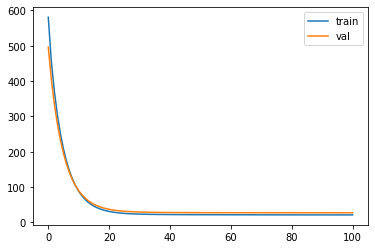

In [32]:
import matplotlib.pyplot as plt
plt.plot(train_losses,label='train')
plt.plot(val_losses,label='val')
plt.legend()
plt.show()